## Analisis Exploratorio de Datos.
Dentro del analisis de datos, un primer paso importante es el analisis exploratorio, donde se intenta comprender cual es la naturaleza de los datos, de donde provienen y que tipo de analisis podria realizarse con ellos. Tambien sirve como un primer filtro para determinar si los datos son o no utiles para el objetivo que se quiera lograr con los datos.

Es conveniente realizar el analisis exploratorio teniendo en cuenta algunas preguntas:
* ¿Cuantos registros hay disponibles? ¿Son pocos? ¿Exceden la capacidad de computo disponible?
* ¿Hay valores nulos? ¿Comprometen la integridad de los datos restantes?
* ¿Hay datos extremos? 
* ¿Hay sesgos?
* ¿A que tipo de variables pertencen los datos?
* ¿Los datos tienen categorias?
* ¿Algunas de las caracteristicas son mas relevantes que otras?
* ¿Existen correlaciones?
* ¿Los datos dependen del tiempo?

El analisis exploratorio depende tambien del tipo de datos que tenemos disponibles: si estan estructurados o no, si son repetitivos, relacionales, si son datos de texto, de audio, de imagen, etc. Es un proceso que puede requerir de distintos enfoques y herramientas para afrontarse. Valga la pena mencionar que es un proceso mas complejo en datos no estructurados, asi que es conveniente empezar con los estructurados para revisar algunas herramientas de analisis. 

Considerando la cantidad de tareas que podrian ser necesarias y que algunas herramientas de visualizacion pueden ser utiles, se usa la libreria Pandas para explorar datos estructurados.

In [22]:
import pandas as pd

In [2]:
# Para ilustrar algunas de las tecnicas y metodos comunes en este analisis
# se usan los conjuntos de microdatos anonimizados de la encuesta 
# multiproposito de 2018
# Para consultar los diccionarios http://microdatos.dane.gov.co/index.php/catalog/565/data_dictionary
# Se descargan los datos
!wget -O identificacion.zip http://microdatos.dane.gov.co/index.php/catalog/565/download/9817
!wget -O gastos.zip http://microdatos.dane.gov.co/index.php/catalog/565/download/9830
!wget -O educacion.zip http://microdatos.dane.gov.co/index.php/catalog/565/download/9824
# Se descomprimen los .zip
!unzip identificacion.zip
!unzip gastos.zip
!unzip educacion.zip

--2021-07-09 19:08:39--  http://microdatos.dane.gov.co/index.php/catalog/565/download/9817
Resolving microdatos.dane.gov.co (microdatos.dane.gov.co)... 170.238.64.38
Connecting to microdatos.dane.gov.co (microdatos.dane.gov.co)|170.238.64.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3308681 (3.2M) [application/x-zip]
Saving to: ‘identificacion.zip’

identificacion.zip  100%[===================>]   3.16M  1.91MB/s    in 1.7s    

2021-07-09 19:08:41 (1.91 MB/s) - ‘identificacion.zip’ saved [3308681/3308681]

--2021-07-09 19:08:41--  http://microdatos.dane.gov.co/index.php/catalog/565/download/9830
Resolving microdatos.dane.gov.co (microdatos.dane.gov.co)... 170.238.64.38
Connecting to microdatos.dane.gov.co (microdatos.dane.gov.co)|170.238.64.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9679624 (9.2M) [application/x-zip]
Saving to: ‘gastos.zip’

gastos.zip          100%[===================>]   9.23M  3.15MB/s    in 2.9s    



Para este ejemplo se usan tres bases de datos de la encuesta multiproposito: identificacion, gastos y educacion. La encuesta fue realizada principalmente sobre la ciudad de Bogota y algunos municipios de Cundinamarca, y tiene registros con registro por ciudad, localidad, UPZ, edificio, vivienda, familia y persona. Se puede consultar la descripcion general de las variables y la codificacion de las mismas en [COLOMBIA - Encuesta Multiproposito](http://microdatos.dane.gov.co/index.php/catalog/565/data_dictionary).

In [3]:
# Los datos se encuentran en los archivos csv. 
# Una vez obtenidos las rutas de los mismos, se pueden leer a objetos dataframe
id=pd.read_csv('/content/Identificacion ( Capitulo A).csv',sep=';')
gastos=pd.read_csv('/content/Otros gastos, gastos semanales ( Capitulo M2).csv',sep=';')
edu=pd.read_csv('/content/Educacion (capitulo H).csv',sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (119,122,276) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Es posible ver algunas de las primeras filas del dataframe con head()
id.head(5)

,DIRECTORIO,SECUENCIA,SECUENCIA_P,ORDEN,NVCAP99,DPTOMPIO,CLASE,TOT_HOG_COMP,FEX_C,LOCALIDAD_TEX,COD_UPZ,CODLOCALIDAD
0,101000,1,1,1,03SEP2017:00:00:00,11001,1,1,"16,604442041",SUBA,23,11
1,101001,1,1,1,03SEP2017:00:00:00,11001,1,1,"26,046357048",USAQUEN,11,1
2,101002,1,1,1,03SEP2017:00:00:00,11001,1,1,"13,840826089",USAQUEN,12,1
3,101003,1,1,1,03SEP2017:00:00:00,11001,1,1,"7,0111108805",USAQUEN,12,1
4,101004,1,1,1,03SEP2017:00:00:00,11001,1,1,"67,930390356",USAQUEN,803,1


En esta tabla aparece el numero unico identificador de cada vivienda (DIRECTORIO), la cantidad de hogares en la vivienda (TOT_HOG_COMP), y otras variables que identifican la vivienda. Notese que los nombres de las variables estan codificadas, lo que hace que revisar el diccionario de datos sea necesario. No es raro encontrar datos codificados pero sin diccionario para realizar la interpretacion. Aunque podrian efectuarse procesos sobre datos codificados, sin saber a que hace referencia cada variable es dificil decidir sobre los resultados obtenidos. Tambien es importante anotar que los datos estan anonimizados de tal modo que no sea posible recuperar las respuestas de un hogar particular a partir de los datos disponibles.

In [5]:
# Se puede empezar por revisar cuantos registros hay disponibles
# para lo que se usa el metodo shape o la funcion len.
print('La cantidad de viviendas registradas es ',id.shape[0])

La cantidad de viviendas registradas es  107218


In [6]:
# Se puede verificar si todos los dataframe tienen la misma cantidad de registros
(len(id)==len(gastos)) and (len(id)==len(edu))

False

In [7]:
# ¿Cuantos registros hay en los otros dataframe?
print('La base Gastos tiene {} registros y la base Educacion {}'.format(len(gastos),len(edu)))

La base Gastos tiene 109111 registros y la base Educacion 301823


Como parte del analisis exploratorio, se debe preguntar a que se debe la diferencia en el numero de registros. Recordando los datos de la base de identificacion, estos tenian registros por vivienda, mientras que las otras tienen registros por hogares o por personas, lo que permite que aparezcan multiples registros que pertenecen a una misma vivienda o un mismo hogar. 

In [8]:
# ¿Cuantas variables pueden tener las otras bases?
print('La base Gastos tiene {} columnas'.format(gastos.shape[1]))
print('La base Educacion tiene {} columnas'.format(edu.shape[1]))

La base Gastos tiene 277 columnas
La base Educacion tiene 128 columnas


In [9]:
# Se puede obtener una lista de las columnas con columns
edu.columns

Index(['DIRECTORIO_PER', 'DIRECTORIO_HOG', 'DIRECTORIO', 'SECUENCIA_P',
       'ORDEN', 'NPCHP1', 'NPCHP2', 'NPCHP3', 'NPCHP4', 'NPCHP4A',
       ...
       'NPCHP34A', 'NPCHP35A', 'NPCHP35B', 'NPCHP35C', 'NPCHP35D', 'NPCHP35E',
       'NPCHP35F', 'NPCHP35J', 'NPCHP35I', 'FEX_C'],
      dtype='object', length=128)

En esta base los nombres de las columnas tambien estan codificadas: cada columna corresponde a una pregunta dentro de la encuesta, y en los diccionarios y metadata esta la pregunta original, con sus opciones de respuesta y codificacion. Esto tambien es relevante, pues una variable podria parecer de tipo numerico y ser la codificacion de una categorica.

In [10]:
# A modo de ejemplo, se puede revisar una de las columnas de la base Educacion
edu['NPCHP35A']

0         2
1         2
2         2
3         1
4         2
         ..
301818    2
301819    2
301820    2
301821    2
301822    2
Name: NPCHP35A, Length: 301823, dtype: object

Al revisar los diccionarios, esta columna corresponde a la pregunta "¿Durante el PRESENTE AÑO, ... ha visto que alguna persona haya sido discriminado(a), molestado(a), o que le hayan hecho sentir mal por alguna de los siguientes motivos: 1. Por su raza u origen étnico". Asi, los valores de la columna son codificaciones.

In [11]:
# Recuperando los valores unicos de la columna
edu['NPCHP35A'].unique()

array(['2', '1', ' '], dtype=object)

Es muy importante en este caso contar con el diccionario de datos, para no cometer errores como efectuar analisis estadisticos basicos sobre estas columnas codificadas: se estaria obteniendo el valor promedio de Si y No.

In [12]:
# Para revisar estadisticas basicas usando herrmientas de Pandas
# una base de datos no codificada puede ser mas util
!wget https://www.datos.gov.co/api/views/vsbi-pju6/rows.csv

--2021-07-09 19:09:00--  https://www.datos.gov.co/api/views/vsbi-pju6/rows.csv
Resolving www.datos.gov.co (www.datos.gov.co)... 52.206.140.205
Connecting to www.datos.gov.co (www.datos.gov.co)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [  <=>               ] 938.22K  2.13MB/s    in 0.4s    

2021-07-09 19:09:01 (2.13 MB/s) - ‘rows.csv’ saved [960735]



In [13]:
# Esta ultima base tiene los datos de vehiculos registrados en el 2015
# La base se puede consultar en https://www.datos.gov.co/Transporte/Parque-Automotor/vsbi-pju6
veh=pd.read_csv('/content/rows.csv')
veh.head(5)

,placavehiculo,cilindraje,modelovehiculo,clasedevehiculo,tipodeservicio,numeromotorvehiculo,numerochasis,capacidadpasajeros,numerofacturadeventa,tipodecombustible,estado
0,932ACL,197.0,2015,MOTOCARRO,PARTICULAR,ZS163QML8F100948,9F2A42007F5001116,1,6084.0,GASOLINA,ACTIVO
1,TBB460,6925.0,1983,CAMION,PUBLICO,FE6108174E,CM203620,2,202618.0,ACPM,ACTIVO
2,BCG793,1300.0,1993,AUTOMOVIL,PARTICULAR,E3326817,323HB21654,5,7031.0,GASOLINA,ACTIVO
3,HMG032,1297.0,1989,AUTOMOVIL,PARTICULAR,E3-256387,323HE-02088,5,56422.0,GASOLINA,ACTIVO
4,FSC321,4230.0,1980,CAMPERO,PARTICULAR,2F410842,FJ4365298,8,7114.0,GASOLINA,ACTIVO


In [14]:
# Igual que antes, algo de informacion basica sobre la cantidad de datos
print('Hay {} registros en {} variables diferentes'.format(veh.shape[0],veh.shape[1]))

Hay 10974 registros en 11 variables diferentes


In [15]:
# Se puede obtener informacion basica acerca del tipo de registros presentes
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10974 entries, 0 to 10973
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   placavehiculo         10974 non-null  object 
 1   cilindraje            10974 non-null  float64
 2   modelovehiculo        10974 non-null  int64  
 3   clasedevehiculo       10974 non-null  object 
 4   tipodeservicio        10974 non-null  object 
 5   numeromotorvehiculo   10974 non-null  object 
 6   numerochasis          10974 non-null  object 
 7   capacidadpasajeros    10974 non-null  int64  
 8   numerofacturadeventa  10377 non-null  float64
 9   tipodecombustible     10974 non-null  object 
 10  estado                10974 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 943.2+ KB


Es un buen conjunto de datos: tiene una buena cantidad de registros y no hay muchos datos nulos (la columna Non-Null dice cuantos datos no nulos hay, faltan algunas facturas). Hay variables cualitativas y cuantitativas (la columna Dtype dice como se reconocieron las variables, float64 e int64 son numeros, object corresponde a  texto)

In [16]:
# Pandas puede realizar calculos estadisticos basicos sobre las variables numericas
# No sobra recordar que si las variables numericas son codificaciones
# dichos calculos pueden ser incorrectos.
veh.describe()

,cilindraje,modelovehiculo,capacidadpasajeros,numerofacturadeventa
count,10974.000000,10974.000000,10974.000000,1.037700e+04
mean,1569.752664,2005.980317,3.090578,4.953770e+07
std,2928.255636,11.176658,4.904780,1.098716e+09
min,0.000000,1941.000000,0.000000,0.000000e+00
25%,124.000000,2003.000000,1.000000,4.840000e+02
50%,198.000000,2009.000000,1.000000,3.298000e+03
75%,1975.000000,2013.000000,5.000000,1.311000e+04
max,140000.000000,2018.000000,72.000000,7.002540e+10


En esta ultima se realizaron calculos estadisticos de conteo, promedios, desviaciones estandar, minimo, maximo y cuartiles sobre las variables numericas. Valga la pena anotar que aunque el numero de factura es una variable numerica, esos calculos no tienen sentido porque los registros de facturas no son comparables. De esta tabla se pueden empezar a ver algunos detalles sobre los datos:
* Hay un registro de al menos un vehiculo modelo 1941.
* Hay al menos un registro de un vehiculo de cilindraje 0 y uno de 0 pasajeros. Es posible que sean registros erroneos, al igual que el cilindraje de 140000.
* Al menos la mitad de los vehiculos tienen una capacidad maxima de un pasajero. Probablemente sean similares a motocicletas.

Se pueden revisar registros particulares para tratar de responder estas preguntas.

In [17]:
veh[veh['modelovehiculo']==1941]

,placavehiculo,cilindraje,modelovehiculo,clasedevehiculo,tipodeservicio,numeromotorvehiculo,numerochasis,capacidadpasajeros,numerofacturadeventa,tipodecombustible,estado
8237,TAG072,4500.0,1941,BUS,PUBLICO,FE6-100749A,99T464910,30,5037.0,ACPM,ACTIVO


Si bien es cierto que hay buses viejos en circulacion, un bus de 1941 destacaria. Ademas que el cilindraje del motor es el mismo que de una camioneta gama media. 

In [18]:
veh[veh['cilindraje']==0]

,placavehiculo,cilindraje,modelovehiculo,clasedevehiculo,tipodeservicio,numeromotorvehiculo,numerochasis,capacidadpasajeros,numerofacturadeventa,tipodecombustible,estado
3196,OKJ801,0.0,1984,VOLQUETA,PARTICULAR,FE6114672B,CM458909,2,0.0,ACPM,ACTIVO
4671,KDH621,0.0,1979,CAMPERO,PARTICULAR,2F340559,FJ4360510,7,212.0,ACPM,ACTIVO
8843,TRK46A,0.0,2008,MOTOCICLETA,PARTICULAR,5AV743163,9FK2P611D82743163,1,NaN,GASOLINA,ACTIVO
8895,CFG59B,0.0,2006,MOTOCICLETA,PARTICULAR,3S8-001232,9FKKE087Z61001232,1,6481.0,GASOLINA,ACTIVO


In [19]:
veh[veh['cilindraje']==veh['cilindraje'].max()]

,placavehiculo,cilindraje,modelovehiculo,clasedevehiculo,tipodeservicio,numeromotorvehiculo,numerochasis,capacidadpasajeros,numerofacturadeventa,tipodecombustible,estado
6395,BAZ081,140000.0,1991,TRACTOCAMION,PUBLICO,30328505,CHA01506,2,0.0,ACPM,ACTIVO


Los de cilindraje cero son datos incompletos. El cilindraje de 140000 es un dato erroneo.

In [20]:
veh[veh['capacidadpasajeros']==0]

,placavehiculo,cilindraje,modelovehiculo,clasedevehiculo,tipodeservicio,numeromotorvehiculo,numerochasis,capacidadpasajeros,numerofacturadeventa,tipodecombustible,estado
55,WIR67A,125.00,2012,MOTOCICLETA,PARTICULAR,E3B6E217233,9FKKE1107C2217233,0,1798.0,GASOLINA,ACTIVO
225,TJY146,2771.00,2014,CAMIONETA,PUBLICO,1B8123,9GDNLR552EB038800,0,NaN,ACPM,ACTIVO
255,WIY29A,124.00,2013,MOTOCICLETA,PARTICULAR,157FMIKE116717,9F2B11255DE204759,0,90.0,GASOLINA,ACTIVO
304,WIL97A,125.00,2010,MOTOCICLETA,PARTICULAR,E3B6E138154,9FKKE1103A2138154,0,586.0,GASOLINA,ACTIVO
305,MSU083,1598.00,2013,AUTOMOVIL,PARTICULAR,HR16-746270G,3N1CK3CD0ZL363652,0,14165.0,GASOLINA,ACTIVO
...,...,...,...,...,...,...,...,...,...,...,...
10844,WIR63A,94.38,2012,MOTOCICLETA,PARTICULAR,JBMBUD87698,9FLPAC1Z2CAK08775,0,2318.0,GASOLINA,ACTIVO
10862,UVJ309,19200.00,2006,TRACTOCAMION,PUBLICO,S79108468,3HSCNAPT96N219177,0,987702.0,ACPM,ACTIVO
10878,WIM17A,124.00,2010,MOTOCICLETA,PARTICULAR,JC40E-6006991,9FMJC4029AF007946,0,775.0,GASOLINA,ACTIVO
10905,DTM35D,199.00,2015,MOTOCICLETA,PARTICULAR,JLZCEG20664,9FLA36FZ8FBB58699,0,9025.0,GASOLINA,ACTIVO


Y hay 230 registros sin numero de pasajeros. Tambien se puede hacer exploracion sobre los datos categoricos, como los conteos de frecuencias.

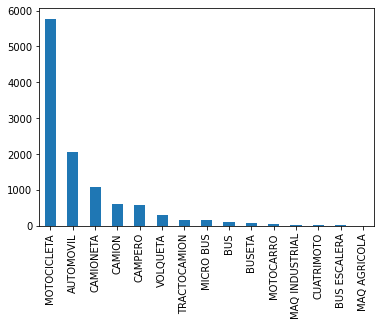

In [21]:
veh['clasedevehiculo'].value_counts().plot(kind='bar')

Se ve que el vehiculo mas registrado fueron las motocicletas. Aunque en estos ejemplos se buscan detalles generales acerca de los datos, conviene tener presentes (si los hay) los objetivos que se quieren alcanzar con los datos, y verificar si es posible conseguirlos con los datos disponibles.

## Visualizacion de Patrones.
Es posible intentar buscar relaciones o patrones entre algunas de las variables presentes, para tratar de definir que variables pueden depender de otras o si hay relaciones entre ellas.

Un analisis comun es la correlacion, para ver si las variables numericas presentan algun tipo de relacion lineal.

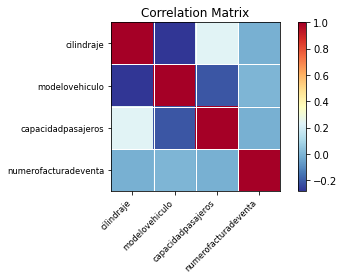

In [24]:
# Se necesitan librerias extra
import matplotlib.pyplot as plt
import statsmodels.api as sm
corr=veh.corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

En una matriz de correlacion se evalua si hay relaciones de crecimiento o decrecimiento lineal entre las variables. Valores cercanos a 1 o -1 indican relaciones fuertes, mientras que valores cercanos a cero muestran poca correlacion y pueden usarse como indicador de independencia (valga la pena anotar que eso debe decidirse con cuidado: una correlacion no es lo mismo que una causalidad). En este ejemplo no hay mucha correlacion entre los datos numericos. La correlacion se define para datos numericos, para ver las relaciones entre datos categoricos se usan analisis mas fuertes como el analisis de correspondencias multiples, que hacen parte de transformaciones mas avanzadas. 

A veces una matriz de correlacion no es tan facil de interpretar como un diagrama de dispersion o de barras.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95876dbe10>,
      dtype=object)

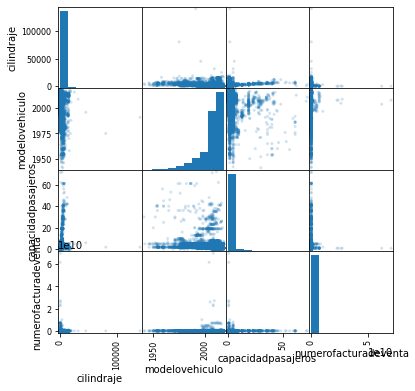

In [25]:
pd.plotting.scatter_matrix(veh, alpha=0.2,figsize=(6,6))

La visualizacion no es tan clara por los datos extremos presentes en los registros. Si solo se usan las columnas de cilindraje, modelo y pasajeros

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1796c5fcd0>,
      dtype=object)

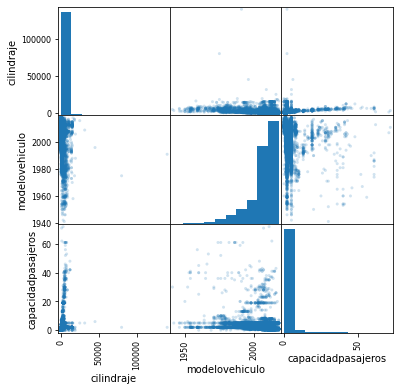

In [ ]:
pd.plotting.scatter_matrix(veh[['cilindraje','modelovehiculo','capacidadpasajeros']], alpha=0.2,figsize=(6,6))

Es conveniente recordar que en los datos hay un sesgo hacia las motocicletas: representan mas de la mitad de los registros. Si se quiere una visualizacion quitando a las motocicletas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17969fa890>,
      dtype=object)

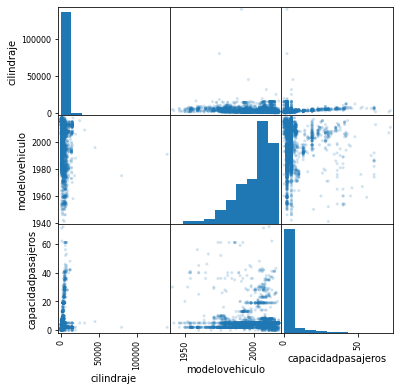

In [ ]:
pd.plotting.scatter_matrix(veh[veh['clasedevehiculo']!='MOTOCICLETA'][['cilindraje','modelovehiculo','capacidadpasajeros']], alpha=0.2,figsize=(6,6))

Para las variables cualitativas se pueden usar diagramas de mosaicos para evaluar la distribucion. Tambien ayuda a identificar posibles sesgos.

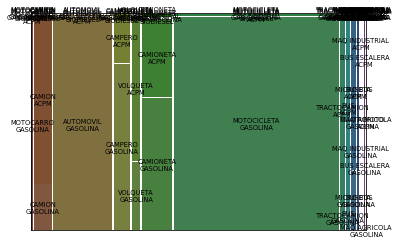

In [27]:
import matplotlib as plt
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 8.0
mosaic(veh, ['clasedevehiculo','tipodecombustible'],axes_label=False);

## Limpieza de datos
Es comun que haya registros incompletos, con datos mal tomados o incorrectos. Dichos datos se deben limpiar, y la libreria pandas tiene herramientas para dicha tarea.

In [28]:
# Retirar registros nulos, o NaN
veh_na=veh.dropna()
print('Los registros originales eran {}, pero quitando todas las filas que tengan al menos un valor NaN quedan {}'.format(len(veh),len(veh_na)))

Los registros originales eran 10974, pero quitando todas las filas que tengan al menos un valor NaN quedan 10377


In [29]:
# Si se quieren quitar valores extremos o atipicos,
# asumiendo una distribucion normal es comun quitar 
# aquellos valores a mas de dos o tres 
# desviaciones estandar de la media 
# Quitando los valores extremos del cilindraje
media=veh['cilindraje'].mean()
desv=veh['cilindraje'].std()
veh_cil=veh[(veh['cilindraje']<media+2*desv) & ((veh['cilindraje']>media-2*desv))]
print('Los registros originales eran {}, pero quitando todos los registros con cilindraje a mas de dos desviaciones de la media quedan {}'.format(len(veh),len(veh_cil)))

Los registros originales eran 10974, pero quitando todos los registros con cilindraje a mas de dos desviaciones de la media quedan 10585


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9586f62210>,
      dtype=object)

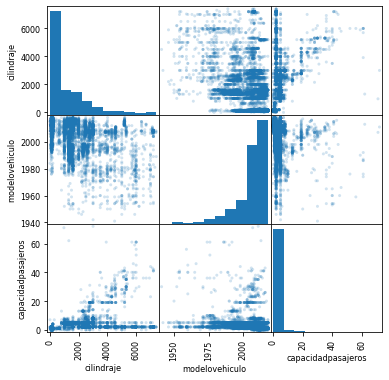

In [30]:
pd.plotting.scatter_matrix(veh_cil[['cilindraje','modelovehiculo','capacidadpasajeros']], alpha=0.2,figsize=(6,6))

In [31]:
# Para ver los nuevos valores
veh_cil['cilindraje'].describe()

count    10585.000000
mean      1198.140348
std       1574.481699
min          0.000000
25%        124.000000
50%        178.600000
75%       1600.000000
max       7400.000000
Name: cilindraje, dtype: float64

Como las motocicletas aun hacen parte de los registros, sesgan los cilindrajes hacia abajo. Puede ser conveniente (por las diferencias en los valores) separar los registros en dos, uno para motocicletas y otro para automobiles. En ese caso tambien seria conveniente quitar registros con baja frecuencia, como la maquinaria agricola.

## Construccion de nuevos registros a partir de los datos existentes
En ciertos casos los registros vienen divididos en distintas bases de datos, y es necesario agruparlos para buscar posibles relaciones. Pandas tambien puede encargarse de esa tarea.

In [ ]:
# Supongase que el objetivo es buscar una relacion entre gastos de 
# libros con años de estudios superiores, organizada de manera geografica.
# Para construir, sobre los datos de la encuesta multiproposito,
# una nueva base que tenga los gastos en libros, discos, cd y dvd, 
# columnas NHCMP9CA (efectivo) y NHCMP9CB (credito) de gastos, y
# la cantidad de años de estudios superiores aprobados
# columna NPCHP5 de edu, agrupados y promediados por localidad,
# se realiza un proceso de union y agrupacion. 
# Dado que el objetivo es filtrar por localidad, se deben usar como identificadores
# las localidades y los identificadores de vivienda.

In [32]:
# Algo de exploracion sobre las localidades
id['LOCALIDAD_TEX'].unique()

array(['SUBA', 'USAQUEN', 'CHAPINERO', 'ENGATIVA', 'SAN CRISTOBAL',
       'FONTIBON', 'TEUSAQUILLO', 'BARRIOS UNIDOS', 'SANTA FE',
       'LOS MARTIRES', 'USME', 'CIUDAD BOLIVAR', 'TUNJUELITO', 'KENNEDY',
       'RAFAEL URIBE URIBE', 'BOSA', 'PUENTE ARANDA', 'ANTONIO NARIÑO',
       'CANDELARIA', ' ', 'OTRA LOCALIDAD RURAL', 'SUMAPAZ'], dtype=object)

In [33]:
# Se retiran los datos que no tienen localidad
# y se dejan directorio y localidad
id_prep=id[id['LOCALIDAD_TEX']!=' '][['DIRECTORIO','LOCALIDAD_TEX']]

In [34]:
# Se preparan los datos de gastos necesarios, ademas de las columnas
# ya nombradas se usa la columna de directorio.
gasto_prep=gastos[['DIRECTORIO','NHCMP9CA','NHCMP9CB']]
# De edu se usan directorio y NPCHP5
edu_prep=edu[['DIRECTORIO','NPCHP5']]

In [35]:
# Se juntan los dataframes, creando posiblemente multiples registros por directorio
datos=id_prep.merge(gasto_prep,on='DIRECTORIO').merge(edu_prep,on='DIRECTORIO')
datos.rename({'NHCMP9CA':'Libros_efectivo','NHCMP9CB':'Libros_credito','NPCHP5':'Años_ed_sup'},axis=1,inplace=True)
datos['Libros_efectivo']=datos['Libros_efectivo'].replace(' ','')
datos['Libros_credito']=datos['Libros_credito'].replace(' ','')
datos['Años_ed_sup']=datos['Años_ed_sup'].replace(' ','')
datos[['Libros_efectivo','Libros_credito','Años_ed_sup']] = datos[['Libros_efectivo','Libros_credito','Años_ed_sup']].apply(pd.to_numeric)
datos.head()

,DIRECTORIO,LOCALIDAD_TEX,Libros_efectivo,Libros_credito,Años_ed_sup
0,101000,SUBA,NaN,NaN,7.0
1,101000,SUBA,NaN,NaN,12.0
2,101000,SUBA,NaN,NaN,5.0
3,101001,USAQUEN,NaN,NaN,NaN
4,101001,USAQUEN,NaN,NaN,4.0


In [37]:
# Ahora se agrupa por localidades, promediando por localidad.
datos2=datos.groupby('LOCALIDAD_TEX').mean()
datos2

,DIRECTORIO,Libros_efectivo,Libros_credito,Años_ed_sup
LOCALIDAD_TEX,,,,
ANTONIO NARIÑO,178470.400000,87100.719424,3964.508393,4.359218
BARRIOS UNIDOS,177249.507939,111448.320413,12816.537468,5.179668
BOSA,200957.961632,52738.578947,2561.403509,3.803335
CANDELARIA,201240.895126,149153.795238,3239.509524,5.249671
CHAPINERO,227945.801370,158386.885246,17796.721311,5.800571
CIUDAD BOLIVAR,199194.181382,54512.809917,6333.057851,3.431895
ENGATIVA,199387.531523,104362.478353,11465.043295,4.473263
FONTIBON,187713.155438,98775.725730,8784.165881,4.914905
KENNEDY,193998.123060,71016.393443,2529.274005,4.258017


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9586fc0250>,
      dtype=object)

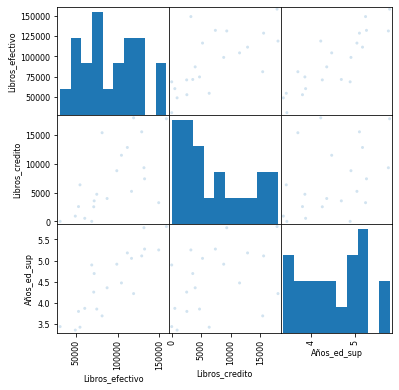

In [38]:
# Una matriz scatter para buscar relaciones
pd.plotting.scatter_matrix(datos2[['Libros_efectivo','Libros_credito','Años_ed_sup']], alpha=0.2,figsize=(6,6))

AttributeError: ignored

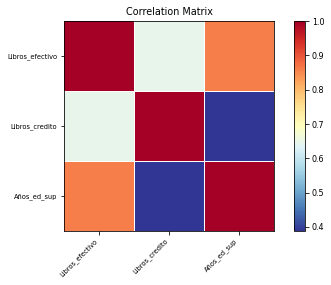

In [39]:
# Una matriz de correlaciones
corr=datos2[['Libros_efectivo','Libros_credito','Años_ed_sup']].corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

Esta matriz de correlacion dice que parece haber una correlacion positiva fuerte entre los gastos de libros en efectivo y los años de educacion superior. Tambien hay una correlacion, aunque mas debil, entre los libros a credito y los años de educacion superior. 

Aunque el proceso de limpieza es general, los procesos de construccion de nueva informacion dependen de los requerimientos que se tengan para el proceso. Tambien pueden considerarse parte del preprocesamiento, antes de empezar a trabajar con modelos mas fuertes.